Метрики регрессии

input - на первой строке через пробел истинные значения, на второй — предсказанные.

output - Метрики MSE, MAE, RMSE


In [ ]:
import numpy as np


def MSE(y, _y):
    return np.mean((y - _y) ** 2)


def MAE(y, _y):
    return np.mean(np.abs(y - _y))


def RMSE(y, _y):
    return MSE(y, _y) ** 0.5
    

y = np.array(list(map(float, input().split())))
_y = np.array(list(map(float, input().split())))

print(f'MSE: {MSE(y, _y):.2f}\nMAE: {MAE(y, _y):.2f}\nRMSE: {RMSE(y, _y):.2f}')

Коэффицент детерминации

input - На первой строке через пробел истинные значения, на второй — предсказанные.

output - Значение метрики R2 с точностью до двух знаков после запятой.

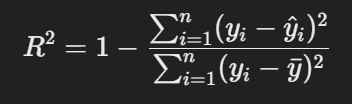

In [7]:
import numpy as np


def R2(y, _y):
    return 1 - (np.sum((y - _y) ** 2) / np.sum((y - np.mean(y)) ** 2))


y = np.array(list(map(float, input().split())))
_y = np.array(list(map(float, input().split())))

print(f'R2: {R2(y, _y):.2f}')

 1 5 2 9 2 3
 1.5 5.2 2.3 8.7 2.8 3.3


R2: 0.97


KNN на практике

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

dataframe = pd.read_csv('penguins.csv')
dataframe.dropna(subset=['sex'], how='all', inplace=True)

labels = dataframe['species']
features = dataframe[['bill_length_mm', 'bill_depth_mm']]


train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=123)

best_accuracy = 0
worst_accuracy = 1

for i in range(1, 11):
    for weights in ['uniform', 'distance']:
        model = KNeighborsClassifier(n_neighbors=i, weights=weights)
        model.fit(train_features, train_labels)

        prediction = model.predict(test_features)
        accuracy = accuracy_score(test_labels, prediction)

        if (accuracy > best_accuracy):
            best_accuracy = accuracy
            
        if (accuracy < worst_accuracy):
            worst_accuracy = accuracy

print('Best accuracy: {:.6f}'.format(best_accuracy))
print('Worst accuracy: {:.6f}'.format(worst_accuracy))

Best accuracy: 0.940299
Worst accuracy: 0.895522
